# CardioML

Elaborato di Programmazione di Applicazioni Data Intensive - 2023

Membri del Gruppo:
- Matteo Iorio
- Fabio Vincenzi
- Stefano Furi

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creazione del DataFrame

Ci siamo posti l'obbiettivo di realizzare un progetto che **possa veramente risultare utile** per alcuni professionisti del settore. Quello che andremo a studiare è un problema che riguarda i fanciulli di tenera età, più in particolare andremo ad analizzare i *risultati di rilevazioni cardiache*, andando a determinare se avranno o meno complicanze cardiache patologiche. 

Il dataset utilizzato riguarda una serie di misurazioni effettuate attraverso [cardiotocografia](https://it.wikipedia.org/wiki/Cardiotocografia), consultabile presso [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/cardiotocography#).



Lo scopo di questo elaborato verrà scritto qui molto presto :)

Decidiamo se mettere il `setup.py` con link qui direttamente alla repo github, così se i prof chiedono solo il file jupyter, possono tranquillamente usarlo senza clonare l'intera repo, mentre invece per i temerari che clonano l'intera repo, il dataset è già qui integrato.

## Preparazione del dataset

In [7]:
raw_df = pd.read_csv("../data/ctg.csv", delimiter=';')

In [8]:
raw_df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,01/12/96,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,03/05/96,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,03/05/96,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,03/05/96,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,03/05/96,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1


SPIEGAZIONE RAPIDA DELLE VARIABILI, DIVISE PER CATEGORICHE E CONTINUE

Alcune variabili categoriche sono state mappate a `np.float64`, mentre altre sarebbe stato sufficiente un tipo `np.int32`. Possiamo quindi ricaricare il dataset, specificando il tipo di dato per ogni colonna, facendo anche riferimento all'utilizzo di memoria

In [9]:
raw_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FileName  2126 non-null   object
 1   Date      2126 non-null   object
 2   SegFile   2126 non-null   object
 3   b         2126 non-null   int64 
 4   e         2126 non-null   int64 
 5   LBE       2126 non-null   int64 
 6   LB        2126 non-null   int64 
 7   AC        2126 non-null   int64 
 8   FM        2126 non-null   int64 
 9   UC        2126 non-null   int64 
 10  ASTV      2126 non-null   int64 
 11  MSTV      2126 non-null   object
 12  ALTV      2126 non-null   int64 
 13  MLTV      2126 non-null   object
 14  DL        2126 non-null   int64 
 15  DS        2126 non-null   int64 
 16  DP        2126 non-null   int64 
 17  DR        2126 non-null   int64 
 18  Width     2126 non-null   int64 
 19  Min       2126 non-null   int64 
 20  Max       2126 non-null   int64 
 21  Nmax      2126

In [64]:
bool_vars = [
    "A", "B", "C", "D", "SH",
    "AD", "DE", "LD", "FS", "SUSP"
]

cat_vars = ["CLASS", "NSP", "Tendency"] #nsp è minuscolo

num_vars = [
    "b", "e", "LBE", "LB", "AC",
    "FM", "UC", "ASTV",
    "MSTV", "ALTV", "MLTV", "DL",
    "DS", "DP", "DR", "Width", "Min",
    "Max", "Nmax", "Nzeros", "Mode",
    "Mean", "Median", "Variance"
]

custom_dtpes = { 
    **{ col: "bool" for col in bool_vars }, 
    **{ col: "category" for col in cat_vars},
    **{ col: "float32" for col in num_vars}
}

In [12]:
raw_df = pd.read_csv("../data/ctg.csv", delimiter=';', dtype=custom_dtpes, decimal=',')

In [49]:
raw_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   file_name               2126 non-null   object  
 1   date                    2126 non-null   object  
 2   seg_file                2126 non-null   object  
 3   start_instant           2126 non-null   float32 
 4   end_instant             2126 non-null   float32 
 5   medical_baseline        2126 non-null   float32 
 6   sisproto_baseline       2126 non-null   float32 
 7   heart_acc               2126 non-null   float32 
 8   foetal_move             2126 non-null   float32 
 9   utherine_contract       2126 non-null   float32 
 10  pct_short_variability   2126 non-null   float32 
 11  mean_short_variability  2126 non-null   float32 
 12  pct_long_variability    2126 non-null   float32 
 13  mean_long_variability   2126 non-null   float32 
 14  light_dec               

In questo modo, abbiamo ridotto di quasi la metà la quantità di memoria utilizzata per mantenere il dataset.

Mappiamo i nomi di aclune colonne in nomi più esplicativi.

In [14]:
col_names = {
    "FileName": "file_name",
    "Date": "date",
    "SegFile": "seg_file",
    "b": "start_instant",
    "e": "end_instant",
    "LBE": "medical_baseline",
    "LB": "sisproto_baseline",
    "AC": "heart_acc",
    "FM": "foetal_move",
    "UC": "utherine_contract",
    "ASTV": "pct_short_variability",
    "MSTV": "mean_short_variability",
    "ALTV": "pct_long_variability",
    "MLTV": "mean_long_variability",
    "DL": "light_dec",
    "DS": "severe_dec",
    "DP": "prolongued_dec",
    "DR": "repetitive_dec",
    "A": "calm_sleep",
    "B": "rem_sleep",
    "C": "calm_vigilance",
    "D": "active_vigilance",
    "SH": "shift_pattern",
    "AD": "acc_pattern_stress", # negativo se pattern in decelerazione
    "DE": "dec_pattern_vagal",
    "LD": "largely_dec",
    "FS": "patho_flat_sinusoidal",
    "SUSP": "suspect"
}

In [15]:
raw_df.rename(columns=col_names, inplace=True)
raw_df.columns = raw_df.columns.str.lower()
raw_df.columns

Index(['file_name', 'date', 'seg_file', 'start_instant', 'end_instant',
       'medical_baseline', 'sisproto_baseline', 'heart_acc', 'foetal_move',
       'utherine_contract', 'pct_short_variability', 'mean_short_variability',
       'pct_long_variability', 'mean_long_variability', 'light_dec',
       'severe_dec', 'prolongued_dec', 'repetitive_dec', 'width', 'min', 'max',
       'nmax', 'nzeros', 'mode', 'mean', 'median', 'variance', 'tendency',
       'calm_sleep', 'rem_sleep', 'calm_vigilance', 'active_vigilance', 'e',
       'acc_pattern_stress', 'dec_pattern_vagal', 'largely_dec',
       'patho_flat_sinusoidal', 'suspect', 'class', 'nsp'],
      dtype='object')

In [43]:
raw_df.head(10)

,file_name,date,seg_file,start_instant,end_instant,medical_baseline,sisproto_baseline,heart_acc,foetal_move,utherine_contract,...,calm_vigilance,active_vigilance,e,acc_pattern_stress,dec_pattern_vagal,largely_dec,patho_flat_sinusoidal,suspect,class,nsp
0,Variab10.txt,01/12/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,False,False,0,False,False,False,True,False,9,2
1,Fmcs_1.txt,03/05/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,False,False,0,True,False,False,False,False,6,1
2,Fmcs_1.txt,03/05/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,False,False,0,True,False,False,False,False,6,1
3,Fmcs_1.txt,03/05/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,False,False,0,True,False,False,False,False,6,1
4,Fmcs_1.txt,03/05/96,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,False,False,0,False,False,False,False,False,2,1
5,Fmcs_2.txt,03/05/96,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,...,False,False,0,False,False,True,False,False,8,3
6,Fmcs_2.txt,03/05/96,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,...,False,False,0,False,False,True,False,False,8,3
7,Hasc_1.txt,22/02/95,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,...,False,False,0,False,False,False,True,False,9,3
8,Hasc_1.txt,22/02/95,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,...,False,False,0,False,False,False,True,False,9,3
9,Hasc_1.txt,22/02/95,CTG0010.txt,181.0,1192.0,122.0,122.0,0.0,0.0,3.0,...,False,False,0,False,False,False,True,False,9,3


Ai fini dello scopo di questo progetto, le colonne `file_name`, `seg_file` e `date` non risultano particolarmente utili per la creazione di modelli predittivi.

In [44]:
df = raw_df.drop(columns=['file_name', 'date', 'seg_file'])

Il dataset è ora utilizzabile per procedere con l'analisi esplorativa.

## Analisi Esplorativa

Possiamo rapidamente vedere quali variabili del dataset hanno correlazione maggiore, per poter poi comprendere come effettivamente alcuni valori possano influenzare altri. Utilizziamo quindi l'indice di correlazione di Pearson.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

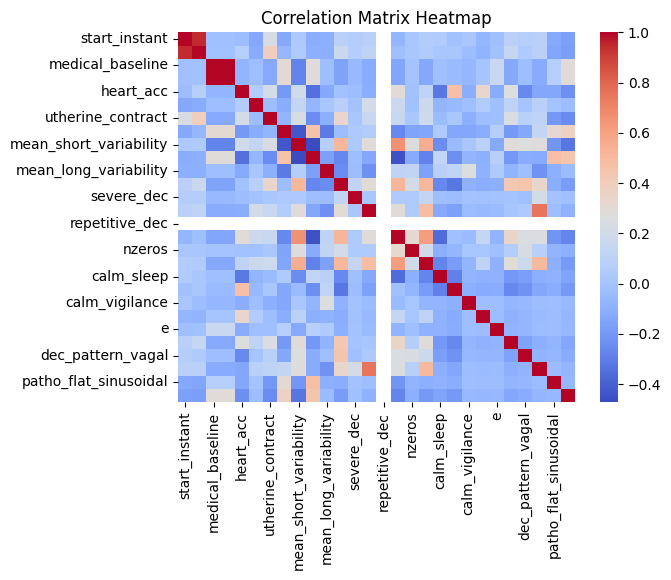

In [47]:
corr_matrix = raw_df.drop(columns=['min', 'mean', 'max','nmax', 'mode', 'median']) \
    .corr(method="pearson", numeric_only=True)

sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")

In [50]:
raw_df.head(5)

,file_name,date,seg_file,start_instant,end_instant,medical_baseline,sisproto_baseline,heart_acc,foetal_move,utherine_contract,...,calm_vigilance,active_vigilance,e,acc_pattern_stress,dec_pattern_vagal,largely_dec,patho_flat_sinusoidal,suspect,class,nsp
0,Variab10.txt,01/12/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,False,False,0,False,False,False,True,False,9,2
1,Fmcs_1.txt,03/05/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,False,False,0,True,False,False,False,False,6,1
2,Fmcs_1.txt,03/05/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,False,False,0,True,False,False,False,False,6,1
3,Fmcs_1.txt,03/05/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,False,False,0,True,False,False,False,False,6,1
4,Fmcs_1.txt,03/05/96,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,False,False,0,False,False,False,False,False,2,1


Creo una **color map** che ci permetterà di rendere i nostri grafici più chiari. La nostra *color map* si basa su una specifica colonna del nostro *data frame*, la colonna **NSP**. All'interno del data frame, la colonna assueme semplicemente 3 valori

In [70]:
df["nsp"].unique()

['2', '1', '3']
Categories (3, object): ['1', '2', '3']

Una volta che abbiamo ricavato tutti i valori *unici* che la colonna **NSP** assume, possiamo realizzare un dizionario, dove troveremo come chiave il valore della colonna, mentre come valore il colore che andremo ad applicare nei vari grafici. Ricordo che i valori di **NSP** corrispondono a:
1. **1**: Normale
2. **2**: Sospetto
3. **3**: Patologico

In [69]:
color_map = {
    '1':"Green",
    '2':"Orange",
    '3':"Red"
}

Optiamo quindi ad applicare il colore **VERDE** al valore **NORMALE** della colonna *NSP*, applicheremo invece il colore **ARANCIONE** al valore **SOSPETTO** ed infine applicheremo il colore **RED** al valore **PATOLOGICO**. Possiamo ora creare la lista contenente tutti colori che andremo ad applicare nei nostri futuri grafici.  

In [73]:
colors = [color_map[val] for val in df["nsp"]]

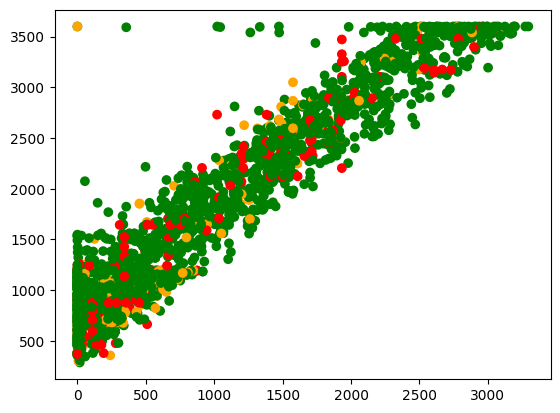

In [80]:
x = df["start_instant"]
y = df["end_instant"]
plt.scatter(x=x, y=y, c=colors)

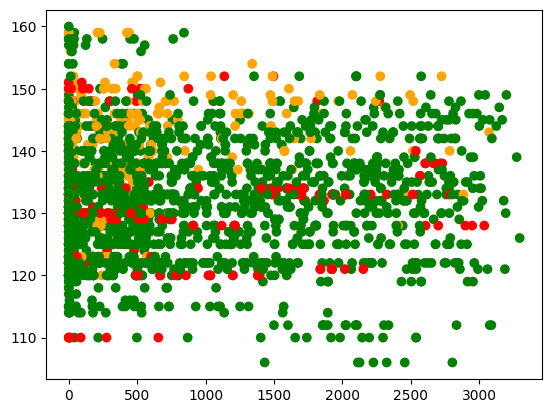

In [81]:
x = df["start_instant"]
y = df["medical_baseline"] 
plt.scatter(x=x, y=y, c=colors)

Spiegare ora la correlzione tra variabili (rosso is better).